# 18 Εφαρμογές Monte Carlo (λύσεις)

<div class="alert alert-block alert-info" style="margin-top: 20px">


<b>ΣΥΝΟΠΤΙΚΑ</b>

Σε αυτό το μάθημα γίνεται μια εισαγωγή στις τεχνικές Monte Carlo, που είναι εξαιρετικά χρήσιμες για μια πληθώρα προβλημάτων. Από τις διάφορες εφαρμογές που υπάρχουν θα επικεντρωθούμε σε δύο:
    
- την χρήση τυχαίας δειγματοληψίας για την λύση προβλημάτων / εύρεση παραμέτρων
   
- την αναζήτηση του εύρους των παραμέτρων σε κάποιο πρόβλημα προσαρμογής καμπύλης, με ταυτόχρονη κατάλληλη επιλογή/παρουσίαση σφαλμάτων. 
    
</div>

- - - 

## 18.1 Εισαγωγή

Οι μέθοδοι Monte Carlo είναι υπολογιστικές τεχνικές που χρησιμοποιούνται ευρέως στη φυσική (και όχι μόνο!) για την επίλυση μια ποικιλίας προβλημάτων που είναι δύσκολα ή αδύνατο να λυθούν αναλυτικά. Συνοπτικά περιλαμβάνουν:

- **Προσομοίωση Πολύπλοκων Συστημάτων:** Οι μέθοδοι Monte Carlo χρησιμοποιούνται εκτενώς για την προσομοίωση της συμπεριφοράς πολύπλοκων φυσικών συστημάτων, όπως η κίνηση ατόμων και μορίων σε υλικά, η δυναμική των ρευστών ή αερίων, η ανίχνευση των σωματιδίων σε πειράματα φυσικής υψηλών ενεργειών. Μέσω δειγματοληψίας από κατανομές πιθανότητας και πολλές τυχαίες επαναλήψεις, οι προσομοιώσεις Monte Carlo μπορούν να παρέχουν πληροφορίες για την συμπεριφορά αυτών των συστημάτων.

- **Ολοκλήρωση και Βελτιστοποίηση:** Μπορούν να χρησιμοποιηθούν για την αριθμητική ολοκλήρωση και την επίλυση προβλημάτων βελτιστοποίησης στη φυσική. Είναι ιδιαίτερα χρήσιμες όταν αντιμετωπίζουμε ολοκληρώματα σε πολλές διαστάσεις, περίπλοκες ή μη-αναλυτικές συναρτήσεις όπου οι παραδοσιακές αναλυτικές μέθοδοι είναι ανεφάρμοστες. Οι τεχνικές ολοκλήρωσης Monte Carlo, όπως η δειγματοληψία σπουδαιότητας (importance sampling) ή η αλυσιδωτή μέθοδος Monte Carlo (Monte Carlo Markov Chain), επιτρέπουν την αποτελεσματική εκτίμηση οκληρωμάτων καθώς και την βελτιστοποίηση συναρτήσεις σε διάφορα πεδία.

- **Ποσοτικοποίηση Αβεβαιότητας:** Οι μέθοδοι Monte Carlo χρησιμοποιούνται για την ποσοτικοποίηση της αβεβαιότητας των παραμέτρων καθώς και για την ανάλυση της διάδοσης σφάλματος. Μέσα από την δημιουργία τυχαίων δειγμάτων που προκύπτουν από τα σφάλματα των μετρήσεων και την διάδοσή τους μέσα από το μοντέλο του πειράματος, μπορούν να υπολογιστούν οι αβεβαιότητες στα τελικά αποτελέσματα.

- **Τυχαίο Δειγματοληψία και Στατιστική Ανάλυση:** Μπορούν να χρησιμοποιηθούν για την τυχαία δειγματοληψία και την στατιστική ανάλυση, όπως είναι για τη δημιουργία τυχαίων δομών για στατιστικά σύνολα, για την εκτέλεση στατιστικών δοκιμών, για την εκτίμηση διαστημάτων εμπιστοσύνης και για την ανάλυση πειραματικών δεδομένων. Οι προσομοιώσεις Monte Carlo βοηθούν στην εύρεση των συναρτήσεων πιθανότητας για τα αποτελέσματα πειραμάτων καθώς και στο να επικυρώνουν θεωρητικά μοντέλα απέναντι σε πειραματικές μετρήσεις. 


## 18.2 Ένα απλό παράδειγμα - προσδιορισμός π

*(πηγή https://medium.com/@ln8378/simulation-103-monte-carlo-modeling-quantum-mechanics-22b79a0110e9 )*

Ας πούμε ότι για κάποιο λόγο (πχ διάσειση, hangover, ...) δεν μπορούμε να θυμηθούμε την τιμή του π. Ωστόσο, θυμόμαστε (ακόμα!) κάποιους τύπους για την επιφάνεια ενός κύκλου και ενός τετραγώνου. Ξέρουμε δηλαδή ότι για τον κύκλο ισχύει $A_c = \pi r^2$ και για το τετράγωνο $A_s = width^2$. Αν θεωρήσουμε τώρα ένα τετράγωνο που εφάπτεται του κύκλου ακριβώς, τότε $width = 2r$, επομένων $A_s = (2r)^2 = 4r^2$. Και για να υπολογίσουμε το π μπορούμε να χρησιμοποιήσουμε τον λόγο $A_c / A_s = \pi/4$, και άρα $\pi = 4*(A_c/A_s)$. 

Παρόλο αυτά δεν έχουμε μια άμεση αίσθηση των τιμών για τις επιφάνειες. Υποθέτουμε όμως (σε μια στιγμή επιφοίτησης) ότι αν αρχίσουμε να ρίχνουμε τυχαία βελάκια τότε ο λόγος του αριθμού τους όπως αυτά θα κατανεμηθούν τυχαία πάνω στις δύο επιφάνειες θα ακολουθεί τον λόγο των επιφανειών, δηλαδή $ N_c / N_s = A_c /A_s $ και άρα από αυτά θα μπορούμε να υπολογίσουμε το $\pi = 4*(Ν_c/Ν_s)$.  


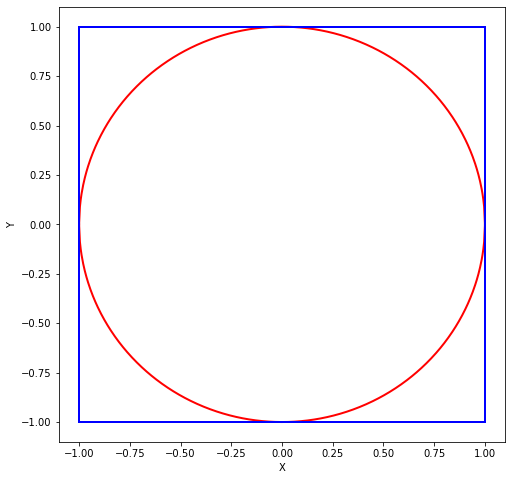

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_frame( ):    
    plt.figure(figsize=(8,8))
    x = np.linspace(-1,1,500)
    y = np.sqrt(1-x**2)


    plt.plot(x,y, c='r', lw=2)
    plt.plot(x,-y, c='r', lw=2)

    plt.plot( [-1,-1], [1,-1], c='b', lw=2)
    plt.plot( [1,1], [-1,1], c='b', lw=2)
    plt.plot( [-1,1], [1,1], c='b', lw=2)
    plt.plot( [-1,1], [-1,-1], c='b', lw=2)



    plt.xlabel('X')
    plt.ylabel('Y')
    
    
plot_frame()    

Για να βρούμε λοιπόν τα βελάκια ανά επιφάνεια θα πρέπει να τα "πετάξουμε" πρώτα. Για αυτό θα χρησιμοποιήσουμε την `random.uniform`.

In [19]:
x = np.random.uniform(-1, 1)
y = np.random.uniform(-1, 1)

print(x,y)

-0.05906323672938396 -0.04825019346247328


Θα πρέπει να "πετάξουμε" πολλά τέτοια βελάκια και θα πρέπει να ελέγξουμε αν "πέφτουν" μέσα στο κύκλο ή όχι. Για αυτό θα χρηισμοποιήσουμετην παρακάτω συνάρτηση.

In [20]:
def estimate_pi(numSamples, show_plot=True):
    """Generate numSamples of darts and throw them at the target.
    Check according to position if in or out the circle.
    Keep track of positions (for plotting) and provide
    an estimate for pi. 
    
    If show_plot=True then plot results
    else not. 
   
    Returns: an estimate of pi
   
    # Example usage:
    estimate_pi(3)
    """
    dartsOut = []
    dartsIn = []
    #Throw random darts
    for i in range(numSamples):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        #Check if darts land in circle
        if (x**2 + y**2) <= 1:
            dartsIn.append((x,y))
        else:
            dartsOut.append((x,y))

    # stimate pi, number of darts in cicle / number of darts in box (all)
    estimate = 4 * len(dartsIn) / numSamples
    
    if show_plot==True:
        # converting to ndarrays for easier handling with plots
        dartsIn = np.asarray(dartsIn)
        dartsOut = np.asarray(dartsOut)

        # call the function to plot the frame
        plot_frame()
        # plot darts in circle and out
        plt.plot(dartsIn[:,0], dartsIn[:,1], 'xr')
        plt.plot(dartsOut[:,0], dartsOut[:,1], '*b')   
    
        print(f'Estimating π~{estimate}')
    
    return estimate

Οπότε και μπορούμε να τρέξουμε αυτό το πείραμα για διαφορετικό αριθμό βελακίων.

Estimating π~3.2


3.2

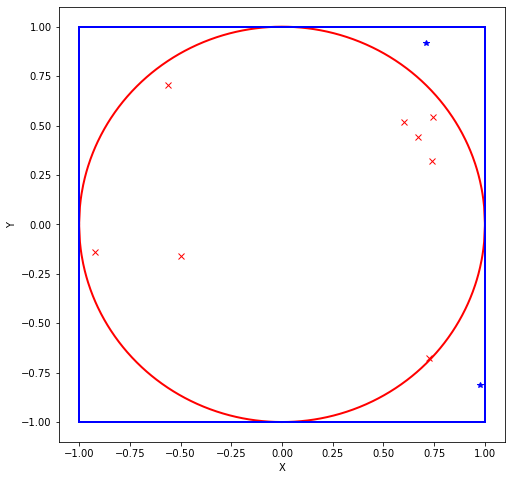

In [21]:
estimate_pi(10)

Estimating π~3.04


3.04

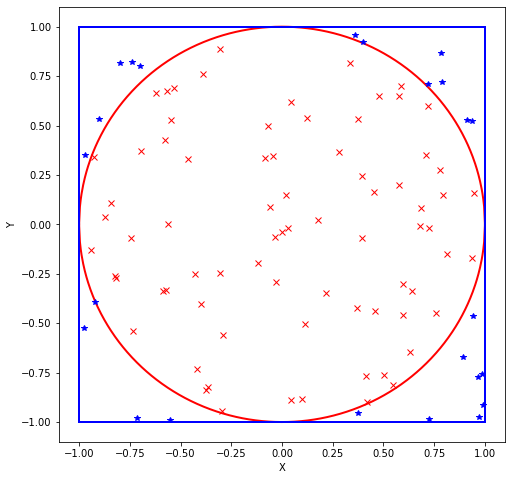

In [5]:
estimate_pi(100)

Παρατηρούμε ότι αν "πετάξουμε" περισσότερα βελάκια το αποτέλεσμα βελτιώνεται. Για να δούμε αυτό λίγο πιο συστηματικά. 

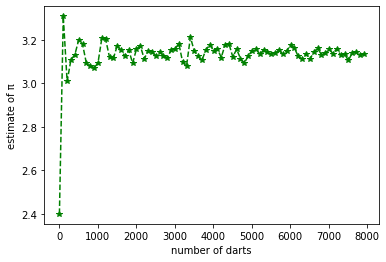

In [6]:
results = []
attempts = np.arange(10,8000,100) #[10,20,30,50,100,200,300,500,1000,2000,3000,5000]

for n in attempts:
    results.append( estimate_pi(n, show_plot=False) )

plt.plot(attempts, results, '*--g')
plt.xlabel('number of darts')
plt.ylabel('estimate of π')
plt.show()    

Βλέπουμε ότι με ένα σχετικά απλό πείραμα και με πολλές επαναλήψεις καταφέραμε να βρούμε την τιμή του π. Η μόνη υπόθεση που έγινε ήταν ότι τα βελάκια ακολουθούν μια κανονική κατανομή από την οποία πήραμε τυχαία δείγματα. 

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 18.1 - Χρήση τυχαίων αριθμών</b>

Η κίνηση Brown αφορά την τυχαία κίνηση σωματιδίων που είναι αιωρούμενα σε ένα ρευστό (υγρό ή αέριο) λόγω συγκρούσεων με τα περιβαλλοντικά μόρια. Είναι μια στοχαστική διαδικασία την οποία μπορούμε να περιγράψουμε ως μια αρχική (τυχαία) τιμή 
    
$$X(0)= X_0$$ 
    
και στη συνέχεια με κινήσεις 
    
$$ X(t+dt)=X(t)+N(0,\delta^2dt;t,t+dt)$$

όπου $N(a,b;t1,t2)$ είναι μια τυχαία μεταβλητή που ακολουθεί μια κανονική κατανομή με μέσο όρο $a$ και διακύμανση $\sigma^2$=$b$. Οι παράμετροι $t1$ and $t2$ κάνουν ρητή αναφορά στην στατιστική ανεξαρτησία μεταξύ διαφορετικών χρονικών διαστημάτων, δηλαδή αν [$t1,t2)$ και $[t3,t4)$ είναι ξεχωριστά διαστήματα τότε οι τιμές $N(a,b;t1,t2)$ και $N(a,b;t3,t4)$ είναι ανεξάρτητες. Με άλλα λόγια η κίνηση Brown δεν εξαρτάται από χρονικά διαστήματα που δεν σχετίζονται άμεσα με το χρονικό διάστημα που βρίσκεται το σωματίδιο τη στιγμή που εξετάζεται. 
   
    
Α. Με δεδομένες τις παραμέτρους που δίνονται παρακάτω, υπολογίστε και τυπώστε τα πρώτα 20 βήματα της κίνησης Brown για μια διάσταση.
    
    
Β. Στη συνέχεια υπολογίστε την κίνηση σε δύο διαστάσεις και κάντε ένα διάγραμμα που να δείχνετε τις μετακινήσεις. Αυξήστε τις κινήσεις σε 500. 

In [ ]:
# You can try it here

# imports...

import numpy as np
import matplotlib.pyplot as plt

# Process parameters
delta = 0.25
dt = 0.1

# Initial condition.
x = 0.0
#y = 0.

# Number of iterations to compute.
n = 20

# code here ....

In [53]:
# Step A

import numpy as np
import matplotlib.pyplot as plt

# Process parameters
delta = 0.25
dt = 0.1

# Initial condition.
x = 0.0

# Number of iterations to compute.
n = 20

# Iterate to compute the steps of the Brownian motion.
for k in range(n):
    x = x + np.random.normal(0,delta*np.sqrt(dt))
    print(x)

0.00339722287638127
-0.012837560295950607
0.08260626219882655
0.14641192812925263
0.18159825028307655
0.2457602139272269
0.19800823057739622
0.22527165272861108
0.3708246006084621
0.44822974545309424
0.5796887723654918
0.5388584138635886
0.5208881059343264
0.5733932437027417
0.5316078480239036
0.46643044212063733
0.3544553440487313
0.35364237452172315
0.42882275241420115
0.3191843121661502


In [54]:
# Step B

import numpy as np
import matplotlib.pyplot as plt

# Process parameters
delta = 0.25
dt = 0.1

# Initial condition.
x = 0.0
y = 0.

# Number of iterations to compute.
n = 500

xs, ys= [], []
# Iterate to compute the steps of the Brownian motion.
# Keep both x and y now
for k in range(n):
    x = x + np.random.normal(0,delta*np.sqrt(dt))
    xs.append(x)
    y = y + np.random.normal(delta*np.sqrt(dt))
    ys.append(y)
    print(x, y)
    
    

-0.01136465069053887 -0.23278812383423625
0.05445002761218412 0.9035003555894243
-0.11738582244133594 1.2393817663917015
-0.3535077179029042 0.5516690236697547
-0.3997532192739234 0.4422000449281206
-0.3906922243398951 -0.3245891267834876
-0.43371430921682114 -0.372286483467703
-0.40228961569024935 0.33324873570527436
-0.39083092906411726 -0.32152635614164915
-0.2764090569580798 0.39908844616008354
-0.27264757992327243 1.994373496853671
-0.2371347246801282 0.43392807620344453
-0.15280183230827304 1.1966517295095498
-0.049833756017533704 0.6826463079217241
-0.05801621926662598 0.3694129544603914
0.004301003459669349 0.2528553453775506
-0.009419334458980086 -0.8241429585304201
0.010038557199998575 -2.7665128268355934
-0.05583556528781862 -3.1070013718841683
0.05473082017299635 -3.4208386333904577
0.11861690731445124 -3.0570594068022054
0.014191926946821712 -2.8512343722676983
0.07438301420634719 -2.106036511235814
0.034148102000861685 -2.6417984704573954
0.09669903180189968 -2.1436772350

Text(0, 0.5, 'Υ')

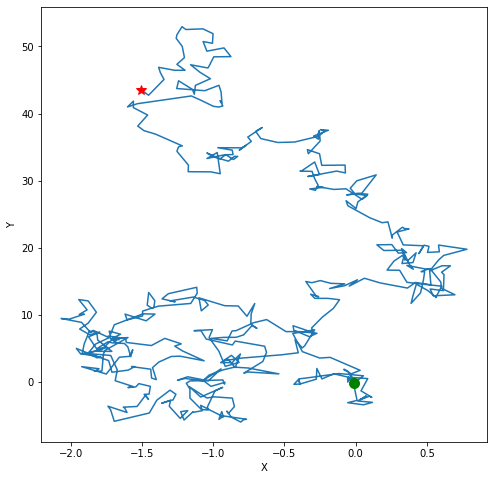

In [55]:
plt.figure(figsize=(8,8))

plt.plot(xs, ys)
plt.plot(xs[0],ys[0], 'og', ms=10)
plt.plot(xs[-1],ys[-1], '*r', ms=10)

plt.xlabel('X')
plt.ylabel('Υ')


<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 18.2 - Ραδιενεργός διάσπαση</b>
    
Η ραδιενεργός διάσπαση είναι η διαδικασία στην οποία παράγεται ένας νέος πυρήνας, που μπορεί να είναι σταθερός ή όχι. Είναι ένα στοχαστικό φαινόμενο που σημαίνει ότι κάθε ατομικός πυρήνας έχει μια πιθανότητα να διασπαστεί σε δεδομένο χρονικό διάστημα, αλλά χωρίς να μπορούμε να προβλέψουμε ποιος θα το κάνει συγκεκριμένα. Η ταχύτητα (ρυθμός) μιας ραδιενεργού διασπάσεως εξαρτάται από την δομή του κάθε πυρήνα.

1. Χρησιμοποιώντας τη μέθοδο Monte Carlo προσομοιώστε τυχαία τη διαδικασία διάσπασης. Αυτό σημαίνει ότι, σε κάθε χρονικό βήμα, κάθε πυρήνας έχει μια πιθανότητα για να διασπαστεί. Δεδομένου ενός αρχικού συνόλου πυρήνων βρείτε πόσοι **δεν** έχουν διασπαστεί μετά από κάποια  χρονικά βήματα. 
    
2. Κάντε μια γραφική των πληθυσμού των αδιάσπαστων πυρήνων με τον χρόνο. 
    
3. Ξέρουμε ότι η ραδιενεργός διάσπαση έχει αναλυτική μορφή: $N(t) = N0 e^{-\lambda t} $, όπου $N(t)$ είναι ο αριθμός των αδιάσπαστων πυρήνων τη χρονική στιγμή $t$, $N0$  είναι ο αρχικός αριθμός πυρήνων, και $\lambda$ η σταθερά διάσπασης (πιθανότητα ανά μονάδα χρόνου). Προσθέστε στην προηγούμενη γραφική παράσταση την θεωρητικά αναμενόμενη καμπύλη και συγκρίνετε τα αποτελέσματά σας.
    
    
> TIP:    
> - Σκεφτείτε ποια πρέπει να είναι η πιθανότητα για να διασπαστεί ένας πυρήνας.
> - Για την δημιουργία τυχαίων τιμών, μπορείτε να χρησιμοποιήσετε την `np.random.random()`.
>
    
4. Τι παρατηρείτε αν αλλάξετε την τιμή του χρονικού βήματος;



In [21]:
# imports ...

# Parameters
N0 = 1000          # Initial number of nuclei
lambda_decay = 0.1 # Decay constant (probability per unit time)
dt = 1.0           # Time step
time_steps = 50    # Total number of time steps



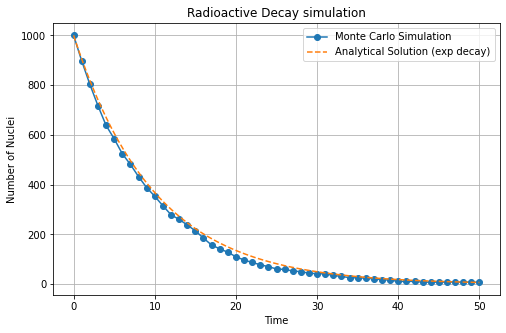

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# initialization
N0 = 1000          # initial number of nuclei
lambda_decay = 0.1 # decay constant (probability per unit time)
dt = 1.0           # time step
time_steps = 50    # total number of time steps

# helful storing arrays
N = [N0]
t = [0]

# monte carlo loop
nondecayed = N0
for step in range(1, time_steps + 1):
    decayed = 0
    for i in range(nondecayed):
        if np.random.random() < lambda_decay * dt:
            decayed += 1
    nondecayed -= decayed
    N.append(nondecayed)
    t.append(step * dt)
    
# analytica solution
t_analytical = np.linspace(0, time_steps*dt, 100)
N_analytical = N0 * np.exp(-lambda_decay * t_analytical)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(t, N, 'o-', label='Monte Carlo Simulation')
plt.plot(t_analytical, N_analytical, '--', label='Analytical Solution (exp decay)')
plt.xlabel('Time')
plt.ylabel('Number of Nuclei')
plt.title('Radioactive Decay simulation')
plt.legend()
plt.grid(True)
plt.show()   

Έστω ότι μεγαλώνουμε το χρονικό βήμα στα 9.0:

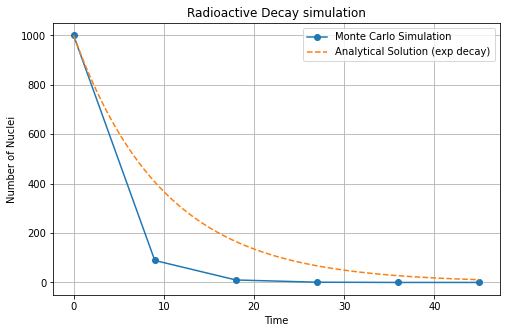

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# initialization
N0 = 1000          # initial number of nuclei
lambda_decay = 0.1 # decay constant (probability per unit time)
dt = 9.0           # time step
time_steps = 5    # total number of time steps

# helful storing arrays
N = [N0]
t = [0]

# monte carlo loop
nondecayed = N0
for step in range(1, time_steps + 1):
    decayed = 0
    for i in range(nondecayed):
        if np.random.random() < lambda_decay * dt:
            decayed += 1
    nondecayed -= decayed
    N.append(nondecayed)
    t.append(step * dt)
    
# analytica solution
t_analytical = np.linspace(0, time_steps*dt, 100)
N_analytical = N0 * np.exp(-lambda_decay * t_analytical)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(t, N, 'o-', label='Monte Carlo Simulation')
plt.plot(t_analytical, N_analytical, '--', label='Analytical Solution (exp decay)')
plt.xlabel('Time')
plt.ylabel('Number of Nuclei')
plt.title('Radioactive Decay simulation')
plt.legend()
plt.grid(True)
plt.show()   

Αλλαγή της τιμής του χρονικού βήματος αλλάζει σημαντικά την συνολική πιθανότητα διάσπασης. Αυτό σημαίνει ότι διασπάται ένας μεγαλύτερος πληθυσμός πολύ πιο γρήγορα από ότι αναμένουμε θεωρητικά. Σε αυτό οφείλεται η απλούστερη στην πιθανότητα διάσπασης, που την υιοθετήσαμε σαν $p = \lambda dt$, που ισχύει για μικρά $dt$. Κανονικά, και όπως ξέρουμε από την θεωρία, η συνολική πιθανότητα είναι $p = 1 - e^{-\lambda dt}$. 

## 18.3 Εκτίμηση αβεβαιότητας

### 18.3.1 Τα δεδομένα 

Σε αυτό το παράδειγμα θα θεωρήσουμε ότι έχουμε σωματίδια τα οποία διασπώνται σε άλλα με το χρόνο. Θα δημιουργήσουμε ένα σετ δεδομένων που έχουν "πειραχθεί" λίγο από τις κανονικές τους τιμές. Θα βρούμε τις παραμέτρους μέσα από προσαρμογή καμπύλης στα δεδομένα μας, και θα εκτιμήσουμε το εκθετικό μέρος του μοντέλου ( $y(t) = t^{-b}$). Θα χρησιμοποιήοσυμε την προσέγγιση Monte Carlo για να εκιτμήοσυμε την αβεβαιότητα στην καλύτερη τιμή της παραμέτρου ($b$).   

Για τις μετρήσεις μας λοιπόν θα χρησιμοποιήσουμε την σχέση $1.5/t$ και θα παράξουμε μερικά μόνο τυχαία νούμερα από μια κανονική κατανομή. 

Text(0, 0.5, 'Measured value')

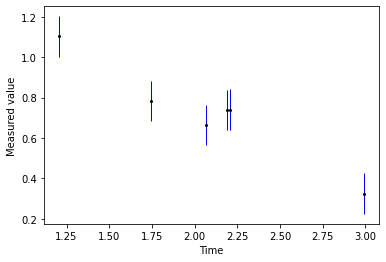

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

# for reproducability
#np.random.seed(2025)

# generating the "measurements" with some errors
xMeas = np.random.uniform(0.5,3.0,size=6)
yTrue = 1.5/xMeas
sError = 0.1
yMeas = yTrue + np.random.normal(scale=sError, size=np.size(yTrue))

plt.errorbar(xMeas,yMeas,yerr=sError,lw=0,elinewidth=1,ecolor='b', fmt='ko',markersize=2)
plt.xlabel('Time')
plt.ylabel('Measured value')
#P.xlim(0.4,3.0)

Θα κάνουμε προσαρμογή καμπύλης όπως έχουμε ήδη δει. 

In [31]:
# define function to fit
def f_decay(x,a,b):
    return a*x**(b)

# fit function to data
vPars, aCova = so.curve_fit(f_decay, xMeas, yMeas) 


# print best params
print(f'a = {vPars[0]:0.3f} +/- {np.sqrt(aCova[0][0]):.3f}')
print(f'b = {vPars[1]:0.3f} +/- {np.sqrt(aCova[1][1]):.3f}')


a = 1.353 +/- 0.161
b = -0.949 +/- 0.195


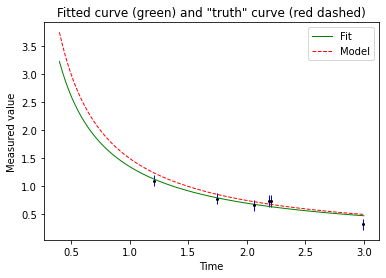

In [32]:
#plt.figure(figsize=(6,6))
xFine = np.linspace(0.4,3.0,100)
plt.errorbar(xMeas,yMeas,yerr=sError,lw=0, elinewidth=1,ecolor='b', fmt='ko',markersize=2)
plt.plot(xFine, f_decay(xFine,*vPars), 'g-', lw=1, label='Fit')      # Fitted parameters
plt.plot(xFine, f_decay(xFine,1.5,-1.0), 'r--', lw=1, label='Model') # Parameters used to generate data
plt.title('Fitted curve (green) and "truth" curve (red dashed)')
plt.xlabel('Time')
plt.ylabel('Measured value')
plt.legend()

Αν δεν ξέραμε το πραγματικό μοντέλο τότε η προσαρμογή που κάναμε, και περνάει αρκετά καλά από τα περισσότερα σημεία, θα λέγαμε ότι πράγματι περιγράφει πολύ καλά τα δεδομένα. Αλλά ποιό **εύρος των τιμών των παραμέτρων** θα ήταν συμβατό με τα δεδομένα μας;

### 18.3.2 Προσέγγιση Monte Carlo

Για να προσδιορίσουμε το εύρος των παραμέτρων θα πρέπει να επαναλάβουμε το ίδιο πείραμα πολλές φορές, παίρνοντας δειγματοληπτικά τιμές από την κατανομή που προέκυψαν τα αρχικά μας δεδομένα. Ξαναδημιουργώντας το σετ δεδομένων κάθε φορά θα προχωράμε την προσαρμογή καμπύλης, υπολογισμό των παραμέτρων $a$ και $b$, και θα αποθηκεύσουμε τα αποτελέσματά μας. 

In [33]:
nTrials = 4000
aFitPars = np.array([])

for iTrial in range(nTrials):
    xTrial = np.random.uniform(0.5,3.0,size=np.size(xMeas))
    yGen = 1.5/xTrial
    yTrial = yGen + np.random.normal(scale=sError,size=np.size(yGen))
    
    # We use a try/except clause to catch pathologies
    try:
        vTrial, aCova = so.curve_fit(f_decay,xTrial,yTrial)
#        print(vTrial)
    except:
        continue  # This moves us to the next loop without stacking.
    
    #here follows the syntax for stacking the trial onto the running sample:
    if np.size(aFitPars) < 1:
        aFitPars = np.copy(vTrial)
    else:
        aFitPars = np.vstack(( aFitPars, vTrial ))
        

# checking how many models failed (if any!)
np.shape(aFitPars)

(4000, 2)

Μετά από όλες αυτές τις επαναλήψεις μπορούμε να δούμε τις τελικές τιμές των παραμέτρων:

In [34]:
print(f'a = {np.mean(aFitPars[:,0]):0.3f} +/- {np.std(aFitPars[:,0]):.3f}')
print(f'b = {np.mean(aFitPars[:,1]):0.3f} +/- {np.std(aFitPars[:,1]):.3f}')

a = 1.507 +/- 0.146
b = -1.004 +/- 0.141


std : 0.141


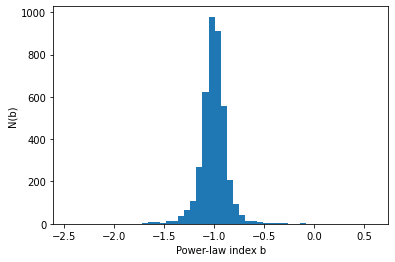

In [35]:
plt.hist(aFitPars[:,1],bins=50)
plt.xlabel('Power-law index b')
plt.ylabel('N(b)')

print(f'std : {np.std(aFitPars[:,1]):0.3f}')

Τέλεια! Βρήκαμε ότι το εκθετικό από τα δεδομένα μας είναι περίπου -1 όσο και αυτό του μοντέλου. Επίσης η κατανομή δείχνει Γκαουσιανή. 

Για να δούμε και την άλλη παράμετρο.

std : 0.146


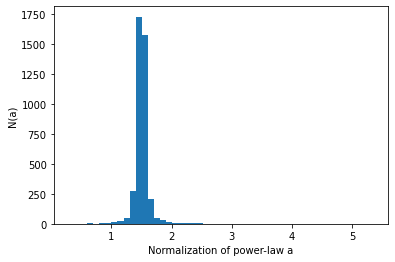

In [36]:
plt.hist(aFitPars[:,0],bins=50)
plt.xlabel('Normalization of power-law a')
plt.ylabel('N(a)')

print(f'std : {np.std(aFitPars[:,0]):0.3f}')

Ας δούμε τώρα κάτι περισότερο, πως κατανέμονται συνολικά στον χώρο οι δύο παράμετροι που εκτιμήσαμε.

Text(0, 0.5, 'Power-law index b')

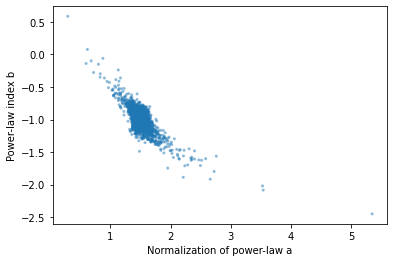

In [37]:
plt.scatter(aFitPars[:,0], aFitPars[:,1], alpha=0.5, s=9, edgecolor='none')
plt.xlabel('Normalization of power-law a')
plt.ylabel('Power-law index b')

το οποίο με ένα μικρό τρικ μπορεί να γίνει πιο εμφανίσημο...

Text(0, 0.5, 'Power-law index b')

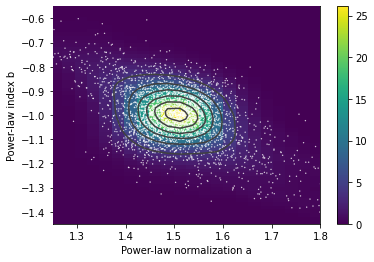

In [38]:
from scipy.stats import kde
x,y=aFitPars.T

# Use a kernel density estimator to produce local-counts in this space, and grid them to plot.
k = kde.gaussian_kde(aFitPars.T)
nbins=200
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# Show the density
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), zorder=3)
plt.colorbar()

# Show the datapoints on top of this, and also the contours. "zorder" sets the vertical order in the plot.
plt.scatter(aFitPars[:,0], aFitPars[:,1], c='w', s=2, zorder=15, edgecolor='none',alpha=0.75)
plt.contour(xi,yi,zi.reshape(xi.shape), zorder=25, colors='0.25')


plt.ylim(-1.45,-0.55)
plt.xlim(1.25,1.80)
plt.xlabel('Power-law normalization a')
plt.ylabel('Power-law index b')

Χρησιμοποιώντας το [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) τρικ πετυχαίνουμε - εκτός από την πιο ενδιαφέρουσα εμφάνιση του διαγράμματος - να **κατασκευάσουμε την συνάρτηση πυκνότητας πιθανότητας (probabaility density function) χρησιμοποιώντας αποκλειστικά τα δεδομένα**. Αυτό είναι εξαιρετικά σημαντικό σε πιο πολύπλοκα προβλήματα όπου δεν ξέρουμε ποιες είναι οι κατανομές που ακολουθούν οι μεταβλητές/παράμετροί μας. 

Επιπλέον σχεδιάζοντας το διάγραμμα μεταξύ των δύο παραμέτρων μπορούμε να συμπεράνουμε και πως σχετίζονται αυτές μεταξύ τους. 

### 18.3.3 Προσδιορισμός σφαλμάτων

Με την χρήση Monte Carlo μπορούμε να πάρουμε ακριβώς όλη την κατανομή των τιμών που μπορεί να πάρει μια παράμετρός μας. Στην προηγούμενη περίπτωση είχαμε Γκαουσιανές κατανομές οπότε και τελικά θα μπορούσαμε να δώσουμε μια τιμή για το σφάλμα που αντιστοιχεί στην παράμετρό μας, χρησιμοποιώντας π.χ. την τυπική απόκλιση. Ωστόσο, όταν η κατανομή δεν είναι Γκαουσιανή τότε θα πρέπει να υπολογίσουμε διαφορετικά τα σφάλματα και να είμαστε πολύ προσεκτικοί/ές στο τι σημαίνει το "1σ".  

Text(0.5, 1.0, 'Right-Skewed Distribution')

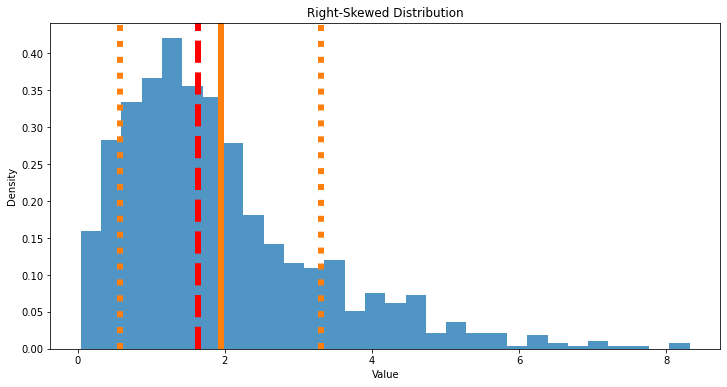

In [43]:
plt.figure(figsize=(12,6))
# generate skewed distribution
data = np.random.gamma(shape=2, scale=1, size=1000)


plt.hist(data, bins=30, density=True, color='tab:blue', alpha=0.78)

mean = np.mean(data)
std = np.std(data)
median = np.median(data)

plt.axvline(median, ls='--', lw=6, c='r')
plt.axvline(mean, lw=6, c='tab:orange')
plt.axvline(mean+std, ls=':', lw=6, c='tab:orange')
plt.axvline(mean-std, ls=':', lw=6, c='tab:orange')


plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Right-Skewed Distribution')

Όπως φαίνεται ξεκάθαρα στο παραπάνω παράδειγμα η μέση τιμή δεν αντικατοπτρίζει αυτό που θα περιμέναμε. Ενδεχόμενα θα περιμέναμε ότι λόγω συχνότητας η καλύτερη τιμή θα εμφανιζόταν κάπου στην κορυφή της κατανομής. 

Επίσης, δεν πρέπει να ξεχνάμε ότι όταν παρουσιάζουμε ένα αποτέλεσμα mean $\pm$ 1σ αυτό σημαίνει ότι όταν σχεδιάζουμε την συνάρτηση πυκνότητας πιθανότητας τότε η περιοχή ανάμεσα σε αυτά τα δύο όριο ( [mean+1σ, mean-1σ] ) θα πρέπει να περικλείει το 68.2%. Για αυτό το λόγο ο πιο ακριβής προσδιορισμός του σφάλματος, όταν η κατανομή αποκλίνει από την Γκαουσιανή, είναι να προσδιορίζουμε εμείς το διάστημα αυτό. 

Τότε θα πρέπει να βρούμε πρώτα την διάμεση τιμή (median) και στην συνέχεια τον αριθμό των μετρήσεων πάνω και κάτω από αυτή την τιμή που προσδιορίζουν το 68.2% όλών των τιμών. Η παρακάτω συνάρτηση κάνει ακριβώς αυτό (με δυνατότητα αλλαγής του διαστήματος εμπιστοσύνης). 

In [44]:
def estimate_err( input_data, sLim=0.682 ):
    """Function to estimate the lower and higher value
    of the input data. 
    By default the 68.2% (or 2sigma) is returned
    but can change given another value.
    
    Function returns the median,low and high value."""
    print(f'>Using {sLim*100}% ')
    
    # find median value
    median = np.median(input_data)
    
    # find the indeces that are higher/lower than the median
    indHi = np.where(input_data >= median)[0]
    indLo = np.where(input_data < median)[0]

    # create the two sets of data, and sort them
    sortHi = np.sort(input_data[indHi])
    sortLo = np.sort(input_data[indLo])

    # find the indeces that correspond to the sLim for each sample
    # have to multiple by size and get the int to have an index
    # keep items up to that index (high value), 
    # or starting from this value (low value)
    valHi = sortHi[int( sLim*np.size(sortHi))]
    valLo = sortLo[-int(sLim*np.size(sortLo))]

    return median, valLo, valHi

Ας το δούμε για δύο διαφορετικές περιπτώσεις.

>Using 68.2% 
(1.6346552698791, 0.7019846522806168, 3.2529685821570613)


Text(0.5, 1.0, 'Right-Skewed Distribution')

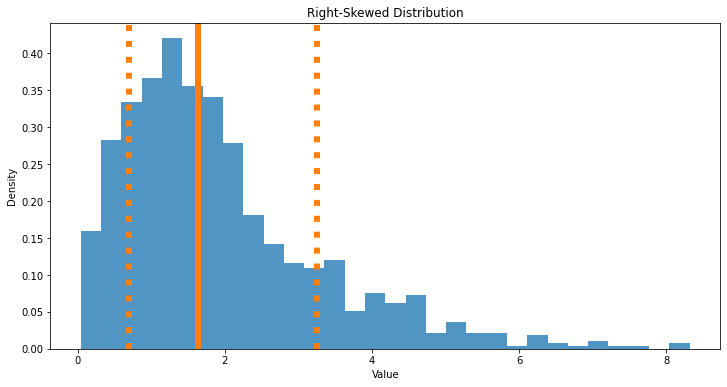

In [51]:
plt.figure(figsize=(12,6))

errors = estimate_err( data )
print(errors)

plt.hist(data, bins=30, density=True, color='tab:blue', alpha=0.78)

plt.axvline(errors[0], lw=6, c='tab:orange')
plt.axvline(errors[1], ls=':', lw=6, c='tab:orange')
plt.axvline(errors[2], ls=':', lw=6, c='tab:orange')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Right-Skewed Distribution')

>Using 99.0% 
(1.6346552698791, 0.10735145488550514, 7.199770630146162)


Text(0.5, 1.0, 'Right-Skewed Distribution')

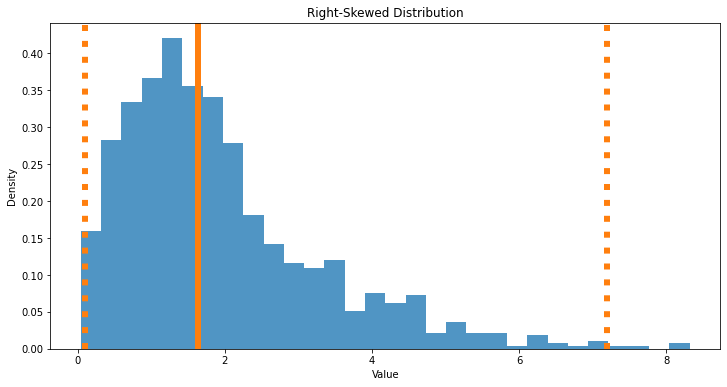

In [52]:
plt.figure(figsize=(12,6))

errors = estimate_err( data, 0.99 )
print(errors)

plt.hist(data, bins=30, density=True, color='tab:blue', alpha=0.78)

plt.axvline(errors[0], lw=6, c='tab:orange')
plt.axvline(errors[1], ls=':', lw=6, c='tab:orange')
plt.axvline(errors[2], ls=':', lw=6, c='tab:orange')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Right-Skewed Distribution')

Κατ' επέκταση οι τιμές που θα πρέπει να αναφερθούν σε κάθε περίπτωση θα είναι:

- για το 68.2%: $1.66_{0.70}^{3.4}$ 

- για το 99.0%: $1.662_{0.097}^{7.80}$

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 18.3</b>

Επαναλάβετε το προηγούμενο πείραμα πρσθέωντας στο μοντέλο μια σταθερά ακόμα (στο 0.5) που αντιστοιχεί στο υπόβαθρο (background), κάνοντας λίγο πιο ρεαλιστικό το όλο πείραμα. Θα πρέπει να ξανακάνετε τα εξής βήματα:
    
1. Υπολογίστε τις αρχικές τιμές και κάντε το διάγραμμα.
    
2. Εκτιμήστε τις καλύτερες παραμέτρους για αυτά τα δεδομένα.    
    
3. Κάντε ένα Monte Carlo πείραμα αλλάζοντας τις πειραματικές τιμές, κάνοντας δειγματοληψία όπως και πριν. 
    
4. Κάντε ένα διάγραμμα με τις αρχικές δύο πρώτες παραμέτρους ($a,b$) και δείτε τις διαφορές με το προηγούμενο παράδειγμα. Τι παρατηρείτε;
    
5. Κάντε τα ιστογράμματα των τιμών για όλες τις παραμέτρους.   
    
6. Υπολογίστε τις καλύτερες τιμές των παραμέτρων τους μαζί με τα σφάλματά τους (για ένα διάστημα εμπιστοσύνης στο 99%) χρησιμοποιώντας την προηγούμενη προσέγγιση για στα σφάλματα σε μη κανονικές κατανομές.    
    
Θεωρώντας όλα τα άλλα ίδια τροποποιήστε τα παρακάτω:

- Προσθέστε μερικά σημεία παραπάνω (15 σύνολο).

- Αυξήστε τον χρόνο στην κατανομή από τον οποίο παίρνετε δείγματα (5.0)    

In [ ]:
# Try it here ...

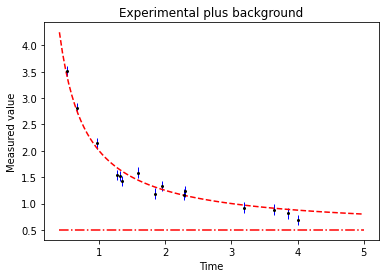

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so


def f_expt(x,a,b,c):
    return a*x**(b)+c

nData=15
sError=0.1
xMeas=np.random.uniform(0.5,5.0,size=nData)
yTrue=f_expt(xMeas,1.5,-1.0,0.5)
yMeas = yTrue + np.random.normal(scale=sError, size=np.size(yTrue))
plt.errorbar(xMeas,yMeas,yerr=sError,lw=0,elinewidth=1,ecolor='b', fmt='ko',markersize=2)

# Some syntax to make the plot a bit clearer
# .xlim(0.4,5.0)
# P.ylim(0.0,3.0)
plt.title('Experimental plus background')
plt.xlabel('Time')
plt.ylabel('Measured value')

# Plot the total model and the constant background
xFine=np.linspace(0.4,5.0,100)
plt.plot([np.min(xFine),np.max(xFine)], [0.5,0.5],'r-.')
plt.plot(xFine,f_expt(xFine,1.5,-1.0,0.5), 'r--')

In [3]:
def f_expt(x,a,b,c):
    return a*x**(b)+c

# optimizing for this dataset
pGuess = [2, -2, 0.2]
vPars, aCova = so.curve_fit(f_expt, xMeas, yMeas, pGuess)

# print best params
print(f'a = {vPars[0]:0.3f} +/- {np.sqrt(aCova[0][0]):.3f}')
print(f'b = {vPars[1]:0.3f} +/- {np.sqrt(aCova[1][1]):.3f}')
print(f'c = {vPars[2]:0.3f} +/- {np.sqrt(aCova[2][2]):.3f}')

a = 1.571 +/- 0.198
b = -0.998 +/- 0.128
c = 0.423 +/- 0.163


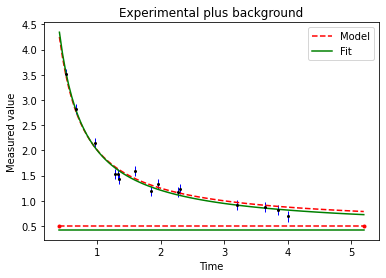

In [4]:
xFine = np.linspace(0.4,5.2,100)

plt.errorbar(xMeas,yMeas,yerr=sError,lw=0,elinewidth=1,ecolor='b', fmt='ko',markersize=2)
plt.plot(xFine,f_expt(xFine,1.5,-1.0,0.5), 'r--', label='Model')
plt.plot([np.min(xFine),np.max(xFine)], [0.5,0.5],'r--.')

plt.plot(xFine,f_expt(xFine,*vPars), 'g-', label='Fit')
plt.plot([np.min(xFine),np.max(xFine)], [vPars[2],vPars[2]],'g-')

# Same labels as before:
# P.xlim(0.4,5.0)
# P.ylim(0.0,3.0)
plt.title('Experimental plus background')
plt.xlabel('Time')
plt.ylabel('Measured value')
plt.legend()

In [5]:
# monte carlo implementation      
        
nTrials = 4000
aFitExpt = np.array([])

for iTrial in range(nTrials):
    xTrial = np.random.uniform(0.5,5.0,size=np.size(xMeas))
    yGen = f_expt(xTrial,1.5,-1.0,0.5)    
    yTrial = yGen + np.random.normal(scale=sError,size=np.size(yGen))
    
    # We use a try/except clause to catch pathologies
    try:
        vTrial, aCova = so.curve_fit(f_expt,xTrial,yTrial, pGuess)
#        print(vTrial)
    except:
        continue  # This moves us to the next loop without stacking.
    
    #here follows the syntax for stacking the trial onto the running sample:
    if np.size(aFitExpt) < 1:
        aFitExpt = np.copy(vTrial)
    else:
        aFitExpt = np.vstack(( aFitExpt, vTrial ))

# checking how many models failed (if any!)
np.shape(aFitExpt)
              

(3966, 3)

Text(0.5, 1.0, 'Three-parameter model')

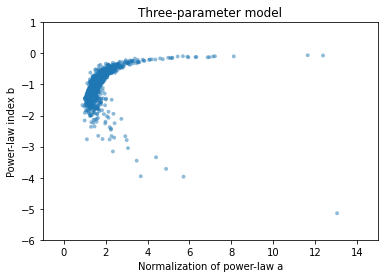

In [14]:
plt.scatter(aFitExpt[:,0], aFitExpt[:,1], alpha=0.5, s=15, edgecolor='none')
plt.xlabel('Normalization of power-law a')
plt.ylabel('Power-law index b')
plt.axis([-1,15,-6,1])    # leaving out a few outlier points.
plt.title('Three-parameter model')

>Using 99.0% 
>Using 99.0% 
>Using 99.0% 


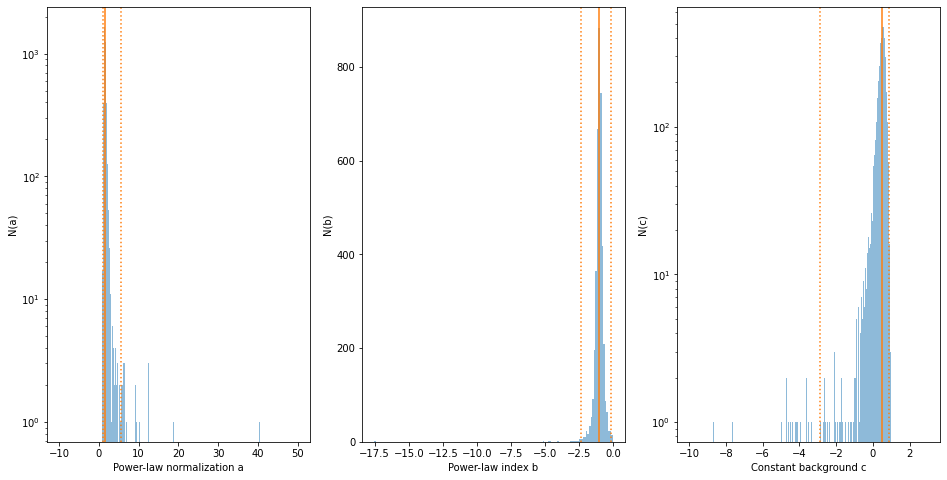

In [34]:
cl = 'tab:orange'

fig, axs = plt.subplots(1,3, figsize=(16,8))

axs[0].hist(aFitExpt[:,0],bins=250,alpha=0.5,range=[-10,50], log=True)
axs[0].set_xlabel('Power-law normalization a')
axs[0].set_ylabel('N(a)')

err0 = estimate_err( aFitExpt[:,0], 0.99 )
axs[0].axvline(err0[0], c=cl)
axs[0].axvline(err0[1], c=cl, ls=':')
axs[0].axvline(err0[2], c=cl, ls=':')


axs[1].hist(aFitExpt[:,1],bins=150,alpha=0.5)
axs[1].set_xlabel('Power-law index b')
axs[1].set_ylabel('N(b)')

err1 = estimate_err( aFitExpt[:,1], 0.99 )
axs[1].axvline(err1[0], c=cl)
axs[1].axvline(err1[1], c=cl, ls=':')
axs[1].axvline(err1[2], c=cl, ls=':')


axs[2].hist(aFitExpt[:,2],bins=250,alpha=0.5,log=True, range=[-10,3]) 
axs[2].set_xlabel('Constant background c')
axs[2].set_ylabel('N(c)')

err2 = estimate_err( aFitExpt[:,2], 0.99 )
axs[2].axvline(err2[0], c=cl)
axs[2].axvline(err2[1], c=cl, ls=':')
axs[2].axvline(err2[2], c=cl, ls=':')


In [35]:
print(f'a = {np.mean(aFitExpt[:,0]):0.3f} +/- {np.std(aFitExpt[:,0]):.3f}')
print(f'b = {np.mean(aFitExpt[:,1]):0.3f} +/- {np.std(aFitExpt[:,1]):.3f}')
print(f'c = {np.mean(aFitExpt[:,2]):0.3f} +/- {np.std(aFitExpt[:,2]):.3f}')

a = 8.011 +/- 402.960
b = -1.029 +/- 0.413
c = 0.409 +/- 0.829


In [ ]:
# EOF